# Homework Assignment 4

This assignment is due **Friday November 29th, at 11:59pm**. Store your homework in **mp248/Assignments/hwk.4.ipynb**. 

Problems 1-4 of this assignment focus on the Nov 18th--22nd labs.  Problem 5 is on the Victoria Transit data.

----

## P.1: 

Given a collection of points $P = \{ p_i : i = 1,2,\cdots, k\} \subset \mathbb R^n$ their **convex hull** will be denoted

$$C(P) = \{ t_1p_1 + t_2p_2 + \cdots + t_kp_k : 0 \leq t_i \leq 1 \ \forall i, t_1+t_2+\cdots+t_k = 1 \}.$$

In this question we ask you to write an algorithm that determines if a point is in the convex hull of a collection of other points.

Notice that a vector $v$ is in the convex hull if and only if you can solve the system of linear equations

$$ v = t_1p_1 + t_2p_2 + \cdots + t_kp_k $$
$$ 1 = t_1 + t_2 + \cdots + t_k$$
together with the inequalities
$0 \leq t_1, t_2, \cdots, t_k \leq 1$.

From the perspective of linear algebra, this is $n+1$ linear equations in $k$ variables, with some constraints. The simplest non-trivial version of this problem is when $k=n+1$.   If your points $P$ in $\mathbb R^n$ do not sit on an affine $n-1$-dimensional subspace of $\mathbb R^n$ we say they are in **general position**.   The convex hull of $n+1$-points that are in general position in $\mathbb R^n$ is called an $n$-simplex.  A $1$-simplex is typically called an *interval*, a $2$-simplex a *triangle*, a $3$-simplex a *tetrahedron*, etc. 

Write a Python function **in_hull(P, v)** that takes as input the points **P** as an $n\times (n+1)$-numpy array (or numpy matrix, or list of lists), with $v$ an $n \times 1$-numpy matrix (array or list of lists, etc).  We expect your code to work correctly with any of the three input types. Have your function return the coefficient vector $T$ as an $(n+1) \times 1$-numpy matrix, if there is a solution.  The function should return **None** otherwise.

**Grading script:** include the output of the following code.

`print(in_hull([[3,4]], [[np.pi]]))`

`print(in_hull([[np.cos(2*np.pi*i/3) for i in range(3)], [np.sin(2*np.pi*i/3) for i in range(3)]], [[0],[0]]))`

`print(in_hull([[np.cos(2*np.pi*i/3) for i in range(3)], [np.sin(2*np.pi*i/3) for i in range(3)]], [[0.5],[0]]))`


In [1]:
import numpy as np

Matrix $P_{2x3}$ =
\begin{pmatrix}
x_1 & x_2 & x_3\\
y_1 & y_2 & y_3\\ 
\end{pmatrix}

In [2]:
def in_hull(P, v):
    '''
    Input:
        P: n x (n+1) numpy array/matrix.
        v: n x 1 numpy matrix
    Output:
        Determines if a point v is in the convex hull of the collection of points - P
        Returns:
            T: Coefficient vector. A (n+1) x 1 numpy matrix. (If a solution exist for t = [0,1])
            None: Otherwise
    '''
    A = np.array([1 for i in range(np.shape(P)[1])])
    #print(A)
    #print(P)
    
    v2 = np.concatenate((v, [[1]]), axis = 0)
    P2 = np.concatenate((P, [A]), axis = 0)
    #print(P2)
    #print(v2)
    
    if np.linalg.det(P2) == 0:
        return None
    else:
        T = np.linalg.solve(P2, v2) # Could also use T = P**-1 * V
        if np.any(T >1) or np.any(T < 0):
            return None
        else:
            #print("True")
            return np.asmatrix(T)

In [3]:
## Test case when P 'matrix' is a numpy matrix
Pm2 = np.matrix([[0,1],[1,0], [1,1]]).T
vm2 = np.matrix([[0.5, 0.5]]).T
in_hull(Pm2, vm2)

matrix([[ 0.5],
        [ 0.5],
        [-0. ]])

In [4]:
## Test case when P 'matrix' is a numpy array
Pm3 = np.array([[1,0,0],[0,0,1],[1, 1, 1], [0, 1, 0]]).transpose()
vm3 = np.matrix([[0.5, 0.5, 0.5]]).T
in_hull(Pm3, vm3)

matrix([[0.25],
        [0.25],
        [0.25],
        [0.25]])

In [5]:
Pm4 = np.matrix([[3],[4]]).T
vm4 = np.matrix([[np.pi]]).T
in_hull(Pm4, vm4)

matrix([[0.85840735],
        [0.14159265]])

In [6]:
## Grading script
print(in_hull([[3,4]], [[np.pi]]))

print(in_hull([[np.cos(2*np.pi*i/3) for i in range(3)], [np.sin(2*np.pi*i/3) for i in range(3)]], [[0],[0]]))

print(in_hull([[np.cos(2*np.pi*i/3) for i in range(3)], [np.sin(2*np.pi*i/3) for i in range(3)]], [[0.5],[0]]))

[[0.85840735]
 [0.14159265]]
[[0.33333333]
 [0.33333333]
 [0.33333333]]
[[0.66666667]
 [0.16666667]
 [0.16666667]]


----

## P.2:

Create a function that takes as input a single integer $n$.  The function will choose $3$ points at random in the unit square, and also an additional $n$ points at random in the unit square $[0,1]^2$.  

The algorithm will then plot the perimiter of the triangle formed by the first three points, as a line plot in black.  It will also plot the remaining $n$ points, using a point plot.  The points in the convex hull of the first three will be coloured red, the points outside the convex hull will be coloured yellow.

Include one plot for $n=1000$. It should be similar to the plot below.

![alt text](../Labs/12a.demo.png)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import random as rd

In [8]:
def P2_func(n):
    '''
    Input: 
        n: Integer
        In a unit square, generate 3 randomized points and form a convex hull out of those three points.
        Randomly generates additional n points in that unit square.
    Output:
        A scatterplot with n randomized points, with points within the convex hull highlighted in red.
    '''
    x = []
    y = []
    x_init = []
    y_init = []
    
    ## The first 3 initial points, round to 3 decimal places:
    for i in range(3):
        x_init.append(np.around(rd.random(), 3) )
        y_init.append(np.around(rd.random(), 3) )
    #print(x_init, y_init)
    
    ## The additional n points, round to 3 decimal places:
    for i in range(n):
        x.append(np.around(rd.random(), 3) )
        y.append(np.around(rd.random(), 3) )
    #print(x[0],y[0])
    
    ## The first 3 points forms the P-matrix in Part 1
    P = np.matrix([ [i for i in x_init], [i for i in y_init] ])
    #print(P)
    #print(P[0])
    
    ## Plot the triangle
    #plt.plot([i for i in x_init], [i for i in y_init], '-r')
    plt.fill([i for i in x_init], [i for i in y_init], fill= False)
    
    ## Determine if a point is within convex hull
    for i in range(n):
        v = np.matrix([ [x[i]], [y[i]] ])
        #print(v)
        test = in_hull(P, v)
        if np.any(test) == None:
            plt.plot(x[i], y[i], 'yo', alpha = 0.5)
        else:
            plt.plot(x[i], y[i], 'ro', alpha = 0.5)

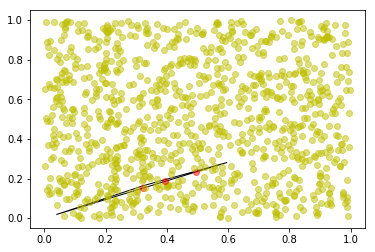

In [9]:
P2_func(1000)

----

## P.3:

As a variant of **P.2**, create a function called **content_estimate(n, pt_ct, runs)** that takes as input three integers.

The goal of **content_estimate** is to estimate the length of the average interval, or the area of the average triangle, etc.  In general, the content of the average simplex in $\mathbb R^n$.  The rough idea comes from **P.2** -- provided one is choosing the points randomly and uniformly, the ratio of the number of red points to the total number of points should (on average) be approximating the area of the triangle. 

The algorithm **content_estimate** will randomly generate **n+1** and **pt_ct** points in $\mathbb R^n$.  It will check which of the **pt_ct** points are in the convex hull of the other **n+1** points, and compute the ratio **A/pt_ct** where $A$ is the number of points from **pt_ct** that are in the convex hull of the **n+1** points.  

The algorithm will repeat the previous step **runs** times, and return the average of all the computations **A/pi_ct**.  Thus your answer, provided **runs** is large enough, should approximate the content of the average $n$-simplex. 

**Grading Script:**

Execute the code below and include the output in your notebook. 

`for n in [1,2,3,4]:
    print("In [0,1]^%d : %1.4f" % (n, content_estimate(n, 200, 1000) ) )`
    
How accurate do you expect these answers to be, i.e. do you have a sense for what any of the exact answers should be?  Perhaps execude the above code several times to get a sense for how much it typically varies.

In [32]:
print(Pm3)
print(Pm3[0,:])
print(Pm3[:,0])

[[1 0 1 0]
 [0 0 1 1]
 [0 1 1 0]]
[1 0 1 0]
[1 0 0]


In [35]:
x = np.matrix([[rd.random() for i in range(2)] for j in range(1)])
y = np.matrix([[rd.random() for i in range(10)] for j in range(1)])
print(y[0,0])

0.4751854894694427


In [56]:
def content_estimate(n, pt_ct, runs):
    '''
    Input: Somes integers n, pt_ct, runs
    Output:
        Randomly generates (n+1) and pt_ct points in R^n. 
            Check which of the pt_ct points are in the convex hull of the other (n+1), 
            and compute the ratio A/pt_ct, where A is the number of points from pt_ct that are 
            in the convex hull of the (n+1) points.
        Repeat the process (runs) times.
        Return:
            Average of all A/pt_ct.
    '''
    ratio_list = []  
    
    ## Repeat (runs) times, return the average of A/pt_ct
    for r in range(runs):
        ## Forming the (n)x(n+1) matrices
        P1 = np.matrix([[rd.random() for i in range(n+1)] for j in range(n)])
        ## n x (pt_ct) matrix (i.e. pt_ct points in R^n)
        P2 = np.matrix([[rd.random() for i in range(pt_ct)] for j in range(n)])
        #print('P1 = ', P1)
        #print('P2 = ', P2)

        ## Determine if a point is within convex hull
        ## Compute the ratio A/pt_ct
        A = 0
        for i in range(pt_ct):
            v = P2[:, i]
            #print('v =', v)
            test = in_hull(P1, v)
            ## If the point is not in the convex hull, skip it.
            if np.any(test) == None:
                continue
            ## Otherwise add it to A
            else:
                A += 1
        ratio_list.append(A/pt_ct)
        
    Avg_ratio = sum(ratio_list)/runs
    #print(Avg_ratio)
    return Avg_ratio

In [54]:
## Test individual case
## 1D Matrix
#content_estimate(1,10,10)
## 2D Matrix
#content_estimate(2,10,10)
## 3D Matrix
#content_estimate(3,10,10)
## 4D Matrix
#content_estimate(4,10,10)

In [58]:
for n in [1,2,3,4]:
    print("In [0,1]^%d : %1.4f" % (n, content_estimate(n, 200, 1000) ) )

In [0,1]^1 : 0.3337
In [0,1]^2 : 0.0753
In [0,1]^3 : 0.0134
In [0,1]^4 : 0.0021


----

## P.4: 

Write an algorithm **on_aff(P, v)** that takes as input a numpy $n \times k$ matrix **P** and a numpy $n \times 1$ vector $v$. The algorithm will determine whether or not $v$ is on the affine subspace of $\mathbb R^n$ spanned by **P**.  

If $v$ is on the affine subspace, have  **on_aff** return the coefficients **T**.  If not, return **None**.

I recommend using [**least squares**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html).  i.e. solve for $\tilde T$ minimizing $||A T - \vec v||^2$. Once you have computed $\tilde T$, check if $||A\tilde T-\vec v||=0$ 

**Comments:**

You are free to use the numpy library linked above, or solve the problem directly, much like our previous least-squares problems.

We give a sketch how one would apply least squares in this situation. The least squares technique tells us the minima $\tilde T$ satisfies

$$ A^T(A \tilde T - \vec v) = 0$$
(this requires a little calculus argument)

Unfortunately, if the point collection $P$ is large relative to the ambient dimension $n$, the matrix $A^TA$ is not invertible -- this is because there are many solutions to the above equation.  One way to bypass this difficulty is to only use variables $t_i$ corresponding to the columns of $A$ that form a basis for the column space, i.e. this amounts to setting redundant variables $t_i=0$. 

---

Create a function **on_hull(P, v)** which takes as input:

1. **P** an arbitrary $n \times k$ numpy matrix

2. **v** an $n \times 1$ numpy matrix.  

Have **on_hull** return the coefficient matrix **T** if it exists, and **None** otherwise. The coefficient matrix would be the coefficients describing **v** as an affine linear combination of the column vectors of **P**.

I suggest first solving for $\tilde T$ using your solution to **Ex.1**. 

----

All solutions to the equations

$$t_1 p_1 + \cdots + t_k p_k = v, \ \ t_1+ \cdots + t_k=1$$

are of the form $T = \tilde T + w$ where $w \in NullSpace(A)$.  

If **v** is not on the affine subspace spanned by **P**, your algorithm would terminate with **None**. 

But if **v** is on the affine subspace spanned by **P**, you would then look for a solution $T$ where $0 \leq t_i \leq 1 \ \forall i$.  

In more geometric language, we are asking if

$$(\tilde T + NullSpace(A)) \cap [0,1]^k \neq \emptyset.$$

This is a standard problem in a subject called **linear programming**.  The basic idea is that since $NullSpace(A)$ is connected and unbounded (provided $Nullity(A)>0$).  So **if** there is such an intersection, there must be an intersection on the boundary of $[0,1]^k$. 

At this point you are free to solve the problem using the suggestion below, or with the [**scipy.optimize.linprog**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) routine.  The challenge in this case would be, how do we rephrase this problem to be one the library can handle? 

Repeating the argument two paragraphs up inductively, if $Nullity(A)=j$ then $\tilde A + NullSpace(A))$ must intersect $[0,1]^k$ on a boundary facet of dimension $k-j$. 

The boundary facets of dimension $k-1$ are precisely $$\{0,1\} \times [0,1]^{k-1}, [0,1] \times \{0,1\} \times [0,1]^{k-2}, \cdots$$
More generally, there are $2^j {k \choose j}$ boundary facets of dimension $k-j$.  One obtains them by taking $j$ of the $[0,1]$ factors of $[0,1]^k$ and replacing $[0,1]$ by $\{0,1\}$.  

----

**In summary, here is our algorithm:**

(1) Compute a basis for the nullspace of **A**. Use numpy's **np.linalg.null_space**. Let $j$ be the dimension of the nullspace.

(2) Iterate over all the $2^j {k \choose j}$ facets of $[0,1]^k$ of dimension $(k-j)$. Call such a facet $F$, and look for  solutions to the equation:
$$(\tilde T + NullSpace(A)) \cap F \neq \emptyset$$

To turn this into a proper set of equations, recall that the facet $F$ of $[0,1]^k$ is defined by demanding that $j$ of the coordinates either equal $0$ or $1$.  Given that $\tilde T + NullSpace(A)$ is $j$-dimensional, this is $j$ linear equations in $j$ variables, i.e. we should typically expect a unique solution.  Provided there is such a solution, we need to check the remaining coordinates are in the interval $[0,1]$. 

Note that if **any** of these equations has a solution, then that is a valid $T$ to return to the user. If **none** of these equation have solutions, then you can return **None**.

----

To test your algorithm create a routine **plot_conv(n,j)** that computes **n** random points in $\mathbb R^2$, and another **j** random points in $\mathbb R^2$.  Plot the **n** random points. Use **red** for the points in the convex hull of the **j** points, and **yellow** for points not in the convex hull. 

If you have time (and the inclination) repeat again in $\mathbb R^3$ using **PlotLy**'s **Scatter3d** feature.  Sample plots are included below.

![alt text](../Labs/12b.demo.png)
![alt text](../Labs/12b.demo2.png)

In [61]:
def on_aff(P, v): 
    '''
    Input:
        P: a numpy (n x k) matrix
        v: a numpy (n x 1) vector
    Determines whether or not v is on the affine subspace of ℝ^𝑛 spanned by P. 
    Basically in_hull(P, v) above, without the constraint 0 ≤ 𝑡𝑖 ≤ 1
    Output:
        T: a coefficient matrix, if v in on the affine subspace:
        None: otherwise
    '''
    A = np.array([1 for i in range(np.shape(P)[1])])
    
    v2 = np.concatenate((v, [[1]]), axis = 0)
    P2 = np.concatenate((P, [A]), axis = 0)

    ## 0 ≤ 𝑡𝑖 ≤ 1 contraints removed
    if np.linalg.det(P2) == 0:
        return None
    else:
        T = np.linalg.solve(P2, v2) # Could also use T = P**-1 * V
        return np.asmatrix(T)

In [64]:
on_aff(Pm4, vm4)

matrix([[0.85840735],
        [0.14159265]])

In [66]:
def on_hull(P, v):
    '''
    Input:
        P: a numpy (n x k) matrix
        v: a numpy (n x 1) vector
    Look for a solution T with the constraint 0 ≤ 𝑡𝑖 ≤ 1
    Linear Programming....
    Output:
        T: a coefficient matrix, if v in on the subspace:
        None: otherwise
    '''
    T = on_aff(P, v)
    if np.any(T >1) or np.any(T < 0):
        return None
    else:
        return np.asmatrix(T)

----

## P.5:

As we have seen in class, there is an unfortunate disconnect between the realtime Victoria Transit data and the information supplied on the bus routes.  In this homework problem we ask you to see if we can fix that problem.  The idea will be to check how closely a bus's real-time data matches all of the routes, and pick the "best fit". 

Notation: We will say a **(latitude, longitude)** pair is "GPS coordinates".  

**Step 1)** Write a routine **dist_to_route(rid, gps)** that computes the shortest distance between the gps coordinates **gps** and **any point** along the route with route id **rid**.  Have the return value in metres.   Use **busDat['routes']** for the list of vertices of the routes. Your route ids should be in the form of the keys to **busDat['routes']**, i.e. '1-10-130' is a valid **rid** for the purpose of **dist_to_route**.

Getting the distances exactly right isn't important, but if you would like to calibrate with me: I will use **6371km** as the radius of the earth, assuming Victoria is at sea level and the earth is a perfect sphere.  This gives me the distance between the Swartz Bay ferry terminal and the Bay Centre, downtown at **29.5km**.  We use "as the crow flies" distance, which is shorter than the Google Maps distance of **32.1km**.  I suggest you re-use your latitude-longitude to 3d-coordinates conversion code from Assignment 3. 

----

**Step 2)** Write a **dist_realt_to_route(rid, route_id)** function where **rid** is the **busDat['routes']** route id, and **route_id** is the **busDat['realtime_data']** route_id.  Have this routine return the average of **dist_to_route(rid, gps)** where **gps** runs over the listed gps coordinates in the relevant realtime data.

**Step 3)** Create a dictionary whose keys are the **route_id** and whose values is the **rid** with the smallest **dist_realt_to_route(rid, route_id)**.  

**Grading Script** Print your dictionary from (3) using the **pp.pprint** command. 

**Warning:** Problem 5 will take a significant amount of time to execute, once your code is fully functional.  Please start early!

In [69]:
import json

with open('../../mp248-course/Data/vic.trans.json') as f:
    busDat = json.load(f)

In [218]:
import math as ma
import collections as co
import pprint as pp

[Haversine Formula](https://en.wikipedia.org/wiki/Haversine_formula) to calculate distance between 2 gps coordinates

[Another reference](https://www.movable-type.co.uk/scripts/latlong.html)

In [149]:
def gps_distance(coord_1, coord_2):
    '''
    Calculate distance between 2 gps coordinates using Haversine formula linked above
    Formula: 
    a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
    c = 2 ⋅ atan2( √a, √(1−a) )
    distance = R ⋅ c
        where φ = latitude; λ = longitude; R = Earth's radius = 6371 km
              a, c = arbitrary variables.
              "angle" trig functions are in radian
              (lat, long) = GPS format
    '''
    R = 6371 
    lat1_rad = ma.radians(coord_1[0])
    long1_rad = ma.radians(coord_1[1])
    lat2_rad = ma.radians(coord_2[0])
    long2_rad = ma.radians(coord_2[1])
    
    d_lat = lat1_rad - lat2_rad
    d_long = long1_rad - long2_rad
    
    a = ma.sin(d_lat/2)**2 + ma.cos(lat1_rad) * ma.cos(lat2_rad) \
    * ma.sin(d_long/2)**2
    c = 2* ma.atan2( ma.sqrt(a), ma.sqrt(1 - a) )
    distance = R * c # in km
    
    return distance

In [154]:
# Swartz Bay ferry terminal to The Bay Centre, Downtown Victoria.
gps_distance([48.6886, -123.4114], [48.4252 , -123.3665])

29.474569396829885

In [156]:
def dist_to_route(rid, gps):
    '''
    Input:
        rid: Route ID
        gps: GPS coordinates
    
    Return:
        The shortest distance between gps and (any point) along the route with route ID, rid.
    '''
    co_1 = [gps[1], gps[0]] # (lat, long) for gps
    dist_list = []
    for i in busDat['routes'][rid]:
        co_2 = i
        dist_list.append(gps_distance(co_1, co_2))
    return(min(dist_list) * 1000) ## Convert km to metre

In [157]:
dist_to_route('1-10-130', [48.6886, -123.4114])

15965.130170407452

In [243]:
def dis_realt_to_route(rid, route_id):
    '''
    Input:
        rid: busDat['routes'] route id
        route_id: busDat['realtime_data'] route_id
    Ouput:
        Return the average of dist_to_route(rid, gps) 
        where gps runs over the listed gps coordinates in the relevant realtime data
    '''
    gps_realtime_lat = [ i['latitude'] for i in busDat['realtime_data'] if i['route_id'] == route_id ]
    gps_realtime_long = [ i['longitude'] for i in busDat['realtime_data'] if i['route_id'] == route_id ]
    dist = []
    for i in range(len(gps_realtime_lat)):
        gps_realtime = [ gps_realtime_lat[i], gps_realtime_long[i] ]        
        d = dist_to_route(rid, gps_realtime)
        dist.append(d)
    avg_dist = sum(dist)/len(dist)
    return(avg_dist)

In [244]:
dis_realt_to_route('1-10-130', '33')

5924.055677371401

In [124]:
busDat['routes']['1-10-130']

[[-123.327931, 48.433693],
 [-123.32783799999999, 48.433734],
 [-123.32728300000001, 48.433978],
 [-123.327049, 48.434081],
 [-123.326793, 48.434109],
 [-123.326555, 48.434071],
 [-123.32593100000001, 48.433772],
 [-123.325479, 48.43376],
 [-123.32549399999999, 48.433544],
 [-123.325751, 48.431627],
 [-123.325675, 48.431497],
 [-123.326104, 48.431393],
 [-123.326104, 48.431393],
 [-123.32676200000002, 48.431233],
 [-123.327265, 48.431059000000005],
 [-123.32775600000001, 48.430766999999996],
 [-123.328376, 48.430334],
 [-123.32891799999999, 48.430099],
 [-123.329502, 48.429846000000005],
 [-123.329502, 48.429846000000005],
 [-123.33016299999998, 48.429559000000005],
 [-123.33006499999999, 48.429784000000005],
 [-123.329796, 48.430805],
 [-123.32959, 48.431574],
 [-123.329523, 48.431974],
 [-123.329523, 48.431974],
 [-123.32946799999999, 48.432301],
 [-123.33314299999999, 48.432472],
 [-123.333669, 48.433186],
 [-123.333754, 48.433487],
 [-123.333771, 48.433942],
 [-123.334337, 48.43397

In [190]:
busDat['routes'].keys()

dict_keys(['1-1-77', '1-1-78', '1-10-128', '1-10-130', '1-10-132', '1-10-142', '1-11-311', '1-11-361', '1-11-442', '1-11-443', '1-11-446', '1-11-447', '1-11-448', '1-11-449', '1-11-450', '1-12-152', '1-12-153', '1-12-155', '1-13-52', '1-13-53', '1-14-488', '1-14-489', '1-14-496', '1-14-497', '1-14-499', '1-14-544', '1-14-545', '1-14-546', '1-14-547', '1-15-397', '1-15-398', '1-15-399', '1-15-416', '1-15-471', '1-15-472', '1-16-224', '1-16-225', '1-17-73', '1-17-74', '1-2-312', '1-2-313', '1-2-314', '1-2-315', '1-2-316', '1-2-317', '1-2-318', '1-2-326', '1-21-410', '1-21-411', '1-21-413', '1-21-418', '1-21-419', '1-21-420', '1-21-79', '1-21-80', '1-22-624', '1-22-625', '1-22-626', '1-22-627', '1-22-633', '1-22-634', '1-22-635', '1-22-636', '1-22-637', '1-22-638', '1-22-639', '1-22-640', '1-22-641', '1-22-642', '1-22-643', '1-22-661', '1-22-668', '1-22-669', '1-22-670', '1-22-671', '1-22-672', '1-22-673', '1-22-674', '1-22-675', '1-22-676', '1-22-677', '1-22-678', '1-22-679', '1-24-306',

In [232]:
pp.pprint([ (i['latitude'], i['longitude']) for i in busDat['realtime_data'] if i['route_id'] == '33']) 

[(48.448822021484375, -123.3731918334961),
 (48.44533157348633, -123.37104034423828),
 (48.44404220581055, -123.37029266357422),
 (48.44236755371094, -123.36930084228516),
 (48.4422607421875, -123.36924743652344),
 (48.4422607421875, -123.36924743652344),
 (48.44181823730469, -123.36900329589844),
 (48.440086364746094, -123.3680419921875),
 (48.43855667114258, -123.36717987060547),
 (48.43855667114258, -123.36717987060547),
 (48.435848236083984, -123.36567687988281),
 (48.435264587402344, -123.36537170410156),
 (48.434818267822266, -123.36505126953125),
 (48.43240737915039, -123.36470031738281),
 (48.43075180053711, -123.36459350585938),
 (48.430389404296875, -123.36457824707031),
 (48.42871856689453, -123.36456298828125),
 (48.4287109375, -123.36457061767578),
 (48.4192008972168, -123.36591339111328),
 (48.419586181640625, -123.36618041992188),
 (48.421817779541016, -123.36608123779297),
 (48.42216110229492, -123.3659896850586),
 (48.42375946044922, -123.36552429199219),
 (48.42443847

 (48.46287536621094, -123.44905853271484),
 (48.462135314941406, -123.45270538330078),
 (48.460533142089844, -123.45489501953125),
 (48.45936584472656, -123.45714569091797),
 (48.45707321166992, -123.45877838134766),
 (48.454627990722656, -123.46138763427734),
 (48.45132064819336, -123.4639892578125),
 (48.45022201538086, -123.46456909179688),
 (48.445743560791016, -123.46684265136719),
 (48.4453010559082, -123.46707153320312),
 (48.44427490234375, -123.46786499023438),
 (48.44406509399414, -123.46797180175781),
 (48.44239807128906, -123.47039031982422),
 (48.44257736206055, -123.47108459472656),
 (48.443599700927734, -123.47488403320312),
 (48.44398880004883, -123.47599029541016),
 (48.44528579711914, -123.48076629638672),
 (48.44584274291992, -123.48419189453125),
 (48.446407318115234, -123.48882293701172),
 (48.44693374633789, -123.49368286132812),
 (48.4471549987793, -123.49452209472656),
 (48.44733428955078, -123.4952621459961),
 (48.448081970214844, -123.49716186523438),
 (48.448

 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.45892333984375, -123.40080261230469),
 (48.4217529296875, -123.36608123779297),
 (48.42373275756836, -123.36553192138672),
 (48.424034118652344, -123.36539459228516),
 (48.424034118652344, -123.36539459228516),
 (48.42649841308594, -123.36479949951172),
 (48.42702102661133, -123.36468505859375),
 (48.42770767211914, -123.36445617675781),
 (48.42789077758789, -123.36444091796875),
 (48.43000411987305, -123.36438751220703),
 (48.431800842285156, -123.36450958251953),
 (48.43217468261719, -123.36448669433594),
 (48.4346923828125, -123.36480712890625),
 (48.43543

 (48.44375228881836, -123.36988067626953),
 (48.44484329223633, -123.37051391601562),
 (48.44563293457031, -123.37096405029297),
 (48.446292877197266, -123.37137603759766),
 (48.446495056152344, -123.37151336669922),
 (48.449974060058594, -123.37370300292969),
 (48.45085144042969, -123.37421417236328),
 (48.45219421386719, -123.3749771118164),
 (48.454776763916016, -123.3768310546875),
 (48.45669937133789, -123.38377380371094),
 (48.45825958251953, -123.39047241210938),
 (48.45836639404297, -123.39228820800781),
 (48.458309173583984, -123.39673614501953),
 (48.45981979370117, -123.40353393554688),
 (48.45981979370117, -123.40353393554688),
 (48.459903717041016, -123.4039077758789),
 (48.459903717041016, -123.4039077758789),
 (48.460025787353516, -123.40420532226562),
 (48.46109390258789, -123.40987396240234),
 (48.464027404785156, -123.41633605957031),
 (48.46411895751953, -123.42524719238281),
 (48.46432113647461, -123.42923736572266),
 (48.464481353759766, -123.43096160888672),
 (48.

 (48.45028305053711, -123.50477600097656),
 (48.44986343383789, -123.50616455078125),
 (48.44844055175781, -123.50701904296875),
 (48.44482421875, -123.50920867919922),
 (48.44305419921875, -123.51016235351562),
 (48.44305419921875, -123.51016235351562),
 (48.44279479980469, -123.50956726074219),
 (48.44297790527344, -123.50740051269531),
 (48.442405700683594, -123.50466918945312),
 (48.44487762451172, -123.50898742675781),
 (48.44525146484375, -123.50872802734375),
 (48.44728088378906, -123.50762939453125),
 (48.44821548461914, -123.50707244873047),
 (48.4502067565918, -123.50474548339844),
 (48.449424743652344, -123.50133514404297),
 (48.44853591918945, -123.49852752685547),
 (48.44751739501953, -123.49601745605469),
 (48.447479248046875, -123.49594116210938),
 (48.447025299072266, -123.49462127685547),
 (48.44682312011719, -123.49348449707031),
 (48.4463005065918, -123.48792266845703),
 (48.445316314697266, -123.48127746582031),
 (48.44450759887695, -123.47782897949219),
 (48.443561

 (48.444862365722656, -123.37052154541016),
 (48.444862365722656, -123.37052154541016),
 (48.445770263671875, -123.37103271484375),
 (48.446746826171875, -123.37162017822266),
 (48.44759750366211, -123.37214660644531),
 (48.449161529541016, -123.37318420410156),
 (48.45168685913086, -123.37466430664062),
 (48.45255661010742, -123.37517547607422),
 (48.45377731323242, -123.3758773803711),
 (48.45530700683594, -123.37786865234375),
 (48.4577522277832, -123.38823699951172),
 (48.458160400390625, -123.38997650146484),
 (48.458316802978516, -123.39678955078125),
 (48.458709716796875, -123.39984130859375),
 (48.45981979370117, -123.40353393554688),
 (48.460472106933594, -123.40650177001953),
 (48.46171188354492, -123.41128540039062),
 (48.46422576904297, -123.41802978515625),
 (48.4641227722168, -123.42577362060547),
 (48.46443176269531, -123.43140411376953),
 (48.46295928955078, -123.43914794921875),
 (48.462528228759766, -123.44725036621094),
 (48.46299362182617, -123.44994354248047),
 (48

 (48.44509506225586, -123.46719360351562),
 (48.442420959472656, -123.4695053100586),
 (48.44266128540039, -123.47146606445312),
 (48.44376754760742, -123.47545623779297),
 (48.444984436035156, -123.47921752929688),
 (48.44584274291992, -123.4842300415039),
 (48.44617462158203, -123.48616790771484),
 (48.44636917114258, -123.48784637451172),
 (48.4466438293457, -123.4918441772461),
 (48.44730758666992, -123.4951400756836),
 (48.44776153564453, -123.49626159667969),
 (48.44892501831055, -123.49897003173828),
 (48.44936752319336, -123.50035095214844),
 (48.449954986572266, -123.50381469726562),
 (48.44802474975586, -123.50727844238281),
 (48.44688415527344, -123.50794219970703),
 (48.44334030151367, -123.5100326538086),
 (48.443016052246094, -123.51020050048828),
 (48.4424934387207, -123.50530242919922),
 (48.44504165649414, -123.50889587402344),
 (48.44674301147461, -123.50794219970703),
 (48.44963455200195, -123.5062026977539),
 (48.449859619140625, -123.50374603271484),
 (48.449344635

 (48.46018981933594, -123.40465545654297),
 (48.46247100830078, -123.41273498535156),
 (48.464168548583984, -123.41988372802734),
 (48.464263916015625, -123.42814636230469),
 (48.46445846557617, -123.43041229248047),
 (48.463890075683594, -123.43399047851562),
 (48.462730407714844, -123.44243621826172),
 (48.46299362182617, -123.44974517822266),
 (48.459529876708984, -123.4568862915039),
 (48.457420349121094, -123.45865631103516),
 (48.455562591552734, -123.46014404296875),
 (48.45232391357422, -123.46326446533203),
 (48.45096206665039, -123.46414947509766),
 (48.44841384887695, -123.46556854248047),
 (48.44660186767578, -123.46646881103516),
 (48.44393539428711, -123.46810913085938),
 (48.44272994995117, -123.46922302246094),
 (48.442665100097656, -123.47151947021484),
 (48.44318771362305, -123.47344970703125),
 (48.44437789916992, -123.4773178100586),
 (48.44501495361328, -123.47925567626953),
 (48.445613861083984, -123.48279571533203),
 (48.44634246826172, -123.48736572265625),
 (48